In this notebook, you should use the equations and general recipe covered in the lecture to perform logistic regression on part of the MNIST dataset. When in doubt, looking at the slides may help your memory ;)

In [1]:
#load packages
import numpy as np
import sklearn.model_selection
import matplotlib.pyplot as plt

In [2]:
#make helper functions

def plot_digit(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title(f'true label: {y[idx][0]}')
    plt.show()


In [3]:
#load data

from mlxtend.data import mnist_data
X, y = mnist_data()

#we just focus on 1's and 0's:
keep=(y==0) | (y==1)
X=X[keep,:]
y=y[keep]

y=np.expand_dims(y,1)

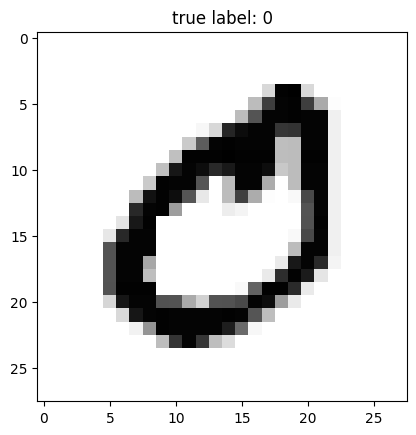

In [4]:
plot_digit(X,y,1)

In [5]:
# create a (binary cross entropy) loss function as discussed in the slides:
def avrLoss(y,a):           #page59 in week1's slides     Binary cross-entropy function
  loss = -(y*np.log(a)+(1-y)*np.log(1-a))
  return np.mean(loss)

In [6]:
#test loss function:
#(just run this cell and see what happens)

loss=avrLoss(np.array([0,1,0,1]),np.linspace(.1,.9,4))
assert np.all(loss==0.5543313122608056)

In [7]:
#create a sigmoid          page 58
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [8]:
#check sigmoid
#(just run this cell and see what happens)

out=sigmoid(np.array(range(-5,5)))
assert np.all(np.around(out,8)==np.array([0.00669285, 0.01798621, 0.04742587, 0.11920292, 0.26894142, 0.5, 0.73105858, 0.88079708, 0.95257413, 0.98201379]))

In [11]:
#make test & train data

Xtrain,Xtest,ytrain,ytest=sklearn.model_selection.train_test_split(X,y,test_size=0.3,shuffle=True)
print(Xtrain.shape) # Datapoints and datasize

(700, 784)


In [50]:
A = np.array([1,2,2])
B = np.array([[2,1,2],[1,2,2],[1,1,1]])
A = np.array([1 for _ in range(700)])

In [93]:
#train
#INITIATE WEIGHTS AND BIASES (w,b)
w = np.random.randn(Xtrain.shape[1], 1) * 0.1  #random
b = np.random.random(1)    #random
nEpoch = 100   #random

accuracy = np.zeros(nEpoch)
trainRate = 0.1 #pick a number less than 1

for iTrain in range(nEpoch):
  #evaluate
  #CALCULATE a
  z = np.matmul(Xtrain,w) + b #Output from single neuron
  a = sigmoid(z) #activation function
  #calculate loss & accuracy
  loss = avrLoss(ytrain, a)      #use the function you defined

  yhat = a > 0.5 #Performin binary classification
  accuracy[iTrain] = np.mean(yhat==ytrain)

  #update weights       page62      the same page with 'UPDATE W AND b'
  wgrad = np.matmul(Xtrain.T, a-ytrain) / Xtrain.shape[0]  #a,ytrain,and xtrian.T,
  bgrad = np.sum(a-ytrain) / Xtrain.shape[0]

#formulas are in page 62,and a is calculated from sigmoid ; y is ytrain;
#                           and x is the data or images you loaded
  assert(wgrad.shape == w.shape)

  #UPDATE W AND b
  w = w - trainRate*wgrad
  b = b - trainRate*bgrad
    
  #Notes: the 'some sensible step size' mentioned in page62 is just the trainRate
  if np.mod(iTrain,10)==0:
    print(iTrain,loss,accuracy[iTrain])

Y_prediction_test = sigmoid(np.matmul(Xtest,w)+b)>0.5
Y_prediction_train = sigmoid(np.matmul(Xtrain,w)+b)>0.5

print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - ytrain)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - ytest)) * 100))

0 nan 0.32142857142857145
10 nan 0.9985714285714286
20 nan 0.9985714285714286
30 nan 0.9985714285714286
40 nan 1.0
50 nan 1.0
60 nan 1.0
70 nan 1.0
80 nan 1.0
90 nan 1.0
train accuracy: 100.0 %
test accuracy: 99.33333333333333 %


C:\Users\bjark\AppData\Local\Temp\ipykernel_17320\901150481.py:3: RuntimeWarning: divide by zero encountered in log
  loss = -(y*np.log(a)+(1-y)*np.log(1-a))
C:\Users\bjark\AppData\Local\Temp\ipykernel_17320\901150481.py:3: RuntimeWarning: invalid value encountered in multiply
  loss = -(y*np.log(a)+(1-y)*np.log(1-a))
C:\Users\bjark\AppData\Local\Temp\ipykernel_17320\2578469755.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


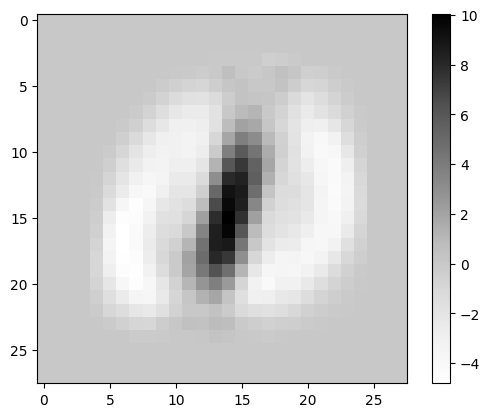

In [90]:
#see what the network does:

img = w.reshape(28,28)
h = plt.imshow(img, cmap='Greys',  interpolation='nearest')
plt.colorbar(h)
plt.show()

Train accuracy:  1.0
Test accuracy:  0.9933333333333333


c:\repositories\DeepLearning\.venv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


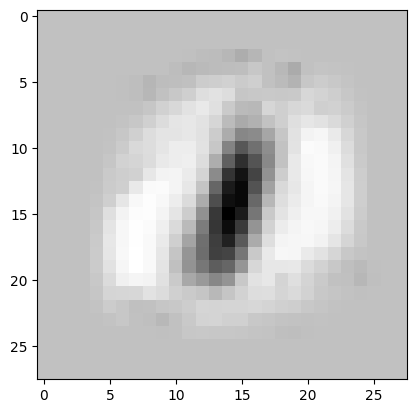

In [91]:
#commpare with scikit-learn:

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(Xtrain, ytrain)

clf.predict(X)
print('Train accuracy: ',clf.score(Xtrain, ytrain))
print('Test accuracy: ',clf.score(Xtest, ytest))

img = (clf.coef_).reshape(28,28)
plt.imshow(img, cmap='Greys',  interpolation='nearest')
plt.show()